In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans # K-Means
from sklearn.metrics import silhouette_score, silhouette_samples # 실루엣 계수 계산

### data 읽어오기

In [108]:
data = pd.read_csv("final_data.csv")
data_size = len(data)
label = data['label']

### 단어에 word2vec 적용하기

In [109]:
from gensim.models import Word2Vec
from gensim.models.keyedvectors import KeyedVectors
import gensim
import numpy as np

# Load a pre-trained Word2Vec model (replace 'path/to/your/model' with the actual path)
model = gensim.models.Word2Vec.load('ko.bin')
print(model.wv.vectors.shape)  # 모델 내 단어 갯수는 30185개

# List of words to be labeled
word_list = label

# Create a dictionary to store word vectors
word_vectors = {}
NaN = []

# Populate the dictionary with word vectors
for word in word_list:
    try:
        new_word = word.strip(" ")
        word_vectors[new_word] = model[new_word]
    except KeyError:
        # Handle the case where the word is not in the vocabulary
        print(f"Word '{new_word}' not in vocabulary.")
        NaN.append(word)
word_vectors
word_df = pd.DataFrame(word_vectors)
word_df

(30185, 200)
Word '정색' not in vocabulary.
Word '놀람' not in vocabulary.
Word '신남' not in vocabulary.
Word '흥겨움' not in vocabulary.
Word '흥겨움' not in vocabulary.
Word '창피' not in vocabulary.
Word '용돈' not in vocabulary.
Word '흥정' not in vocabulary.
Word '반가움' not in vocabulary.
Word '황당' not in vocabulary.
Word '염탐' not in vocabulary.
Word '좋음' not in vocabulary.
Word '눈빛' not in vocabulary.
Word '시큼' not in vocabulary.
Word '흥겨움' not in vocabulary.
Word '민망' not in vocabulary.
Word '시무룩' not in vocabulary.
Word '수줍음' not in vocabulary.
Word '황당' not in vocabulary.
Word '놀람' not in vocabulary.
Word '식탐' not in vocabulary.
Word '광분' not in vocabulary.
Word '황당' not in vocabulary.
Word '까칠' not in vocabulary.
Word '황당' not in vocabulary.
Word '모른척' not in vocabulary.
Word '소리침' not in vocabulary.
Word '소분노' not in vocabulary.
Word '애교' not in vocabulary.
Word '까불' not in vocabulary.
Word '의아심' not in vocabulary.
Word '낭패' not in vocabulary.
Word '허기' not in vocabulary.
Word '까불' not in voc

C:\Users\samsung\anaconda3\lib\site-packages\gensim\models\base_any2vec.py:742: UserWarning: C extension not loaded, training will be slow. Install a C compiler and reinstall gensim for fast training.
  warnings.warn(
C:\Users\samsung\AppData\Local\Temp\ipykernel_17116\736513206.py:21: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  word_vectors[new_word] = model[new_word]


소외      다이어트        실패        긍정        피자        식사        거절  \
0   -0.483972  0.350489 -2.855057  0.604088 -0.249783 -0.078015 -1.639856   
1    0.729992 -0.073935 -2.316781  0.042427 -0.138864 -0.141852  0.313289   
2    0.905891  0.783086 -2.049907  0.334306  0.487499  0.076565 -0.617230   
3   -1.352918 -0.253822 -0.172188 -0.550515  0.655443 -1.799743 -2.516470   
4   -0.534489 -0.219407  0.991559  0.180508  0.213461  0.059684  1.357738   
..        ...       ...       ...       ...       ...       ...       ...   
195 -0.091903  0.594744 -0.574114 -0.301485  0.243577  2.005394 -1.615624   
196  1.107072  0.479835  0.598401  0.100404  0.236785  0.298742 -0.093244   
197  0.488668  0.401557  0.870932  0.431045  0.092349  2.047430  1.049325   
198  2.433382  0.255171 -0.324395 -0.043831  0.956416  2.501294 -0.833250   
199 -0.037658  0.174620 -0.643110 -0.521822  0.177844 -0.937867 -2.530051   

           후회        불만        의문  ...        배제        기운         쌈  \
0   -0.566500 -0.483653 -0.930253  ... -1.141052 -0.488868  0.582259   
1   -0.149665 -1.457357  1.285335  ...  0.325202 -0.558134 -0.292869   
2    0.485574 -0.022496 -0.213127  ... -1.836984  1.118696  0.163051   
3   -1.070929 -0.841431  0.990372  ... -2.533406 -0.477913  0.355790   
4   -0.697496  1.265670  0.682610  ...  0.919822 -0.173301  0.007159   
..        ...       ...       ...  ...       ...       ...       ...   
195  0.163686 -0.002320 -0.135782  ... -0.811525 -0.027841  0.325878   
196  0.073304  0.763229  2.288591  ...  0.363493  0.921475 -0.225511   
197 -0.054836  0.497921  2.000011  ...  0.555157  0.397747  0.016883   
198 -0.129242 -0.830422 -1.351598  ...  2.195479 -0.276788  0.300567   
199 -0.733375 -0.657180 -2.064500  ... -0.920947  0.104997 -0.050133   

           중퇴        기권        불운        택시        악수        단합       첫사랑  
0   -0.389181  0.488638 -0.353876 -0.777993  0.116270  0.105651 -0.408059  
1    0.465061  0.148463  0.012763  0.556049 -0.102036 -0.329373 -0.361370  
2    0.201750 -0.174053  0.118373 -0.493491 -0.266882  0.166661  0.390251  
3   -0.749999 -0.797655 -0.010570 -0.504610 -0.914001 -0.552056 -0.043357  
4   -0.760697  0.299453  0.155991 -1.098105  0.251541  0.204312 -0.242011  
..        ...       ...       ...       ...       ...       ...       ...  
195  0.576907 -0.371526  0.070761  0.199327  0.029952 -0.096820 -0.203547  
196  1.117324 -0.402078  0.440481 -0.156720 -0.168130  0.110475 -0.131888  
197 -0.528362  0.696320  0.125680  0.370761  0.010330 -0.131035 -0.071702  
198  0.546496 -1.529978  0.127028  0.291381  0.205894  0.577021 -0.107796  
199 -1.141816 -0.390911 -0.425117 -1.192952 -0.109291  0.070180 -0.062975  

[200 rows x 627 columns]

#### word2vec 모델에 존재하지 않는 단어들 

In [110]:
print(list(set(NaN)))

['좋음', '수줍음', '반가움', '소리침', '고요함', '황당', '시무룩', '창피', '신남', '민망', '시큼', '용돈', '까불', '눈빛', '흥정', '까칠', '정색', '염탐', '놀람', '인셍', '의아심', '광분', '식탐', '낭패', '흥겨움', '애교', '소분노', '모른척', '허기']


In [111]:
word_matrix = word_df.transpose()
word_matrix

0         1         2         3         4         5         6    \
소외   -0.483972  0.729992  0.905891 -1.352918 -0.534489 -0.246235 -1.429191   
다이어트  0.350489 -0.073935  0.783086 -0.253822 -0.219407 -0.172415 -0.279633   
실패   -2.855057 -2.316781 -2.049907 -0.172188  0.991559 -2.094825 -0.073328   
긍정    0.604088  0.042427  0.334306 -0.550515  0.180508 -0.333037 -0.117227   
피자   -0.249783 -0.138864  0.487499  0.655443  0.213461 -0.402867  1.817255   
...        ...       ...       ...       ...       ...       ...       ...   
불운   -0.353876  0.012763  0.118373 -0.010570  0.155991 -0.082212  0.078788   
택시   -0.777993  0.556049 -0.493491 -0.504610 -1.098105  0.500979  0.562056   
악수    0.116270 -0.102036 -0.266882 -0.914001  0.251541 -0.021427 -0.038164   
단합    0.105651 -0.329373  0.166661 -0.552056  0.204312 -0.228424  0.084427   
첫사랑  -0.408059 -0.361370  0.390251 -0.043357 -0.242011  0.320081 -0.002480   

           7         8         9    ...       190       191       192  \
소외    0.520611 -0.383976  1.008037  ...  0.241350  0.174665 -0.411606   
다이어트  0.704964  0.238278 -0.160904  ... -0.373632  0.288896  0.012419   
실패    1.960894  0.012275  0.211430  ...  0.566378  0.337536 -0.024208   
긍정   -0.265808 -0.576902  0.435154  ... -0.168106 -0.802308  0.358216   
피자    0.645031  0.397606 -0.521637  ... -1.396192  0.220774  1.046692   
...        ...       ...       ...  ...       ...       ...       ...   
불운    0.054140 -0.047410  0.065181  ...  0.144083  0.067802 -0.042004   
택시    0.092105 -0.062316 -2.232370  ... -0.432319 -0.114310 -0.982485   
악수    0.395506  0.410472 -0.115092  ...  0.377181  0.335755  0.205232   
단합    0.284063  0.074972  0.052501  ... -0.087844 -0.352375  0.041892   
첫사랑   0.320883  0.361116  0.233781  ...  0.308603  0.315553 -0.120327   

           193       194       195       196       197       198       199  
소외   -0.288752 -0.160790 -0.091903  1.107072  0.488668  2.433382 -0.037658  
다이어트  0.077824  0.273780  0.594744  0.479835  0.401557  0.255171  0.174620  
실패   -1.114787 -1.478428 -0.574114  0.598401  0.870932 -0.324395 -0.643110  
긍정   -0.951309  0.196382 -0.301485  0.100404  0.431045 -0.043831 -0.521822  
피자    0.155005 -0.372727  0.243577  0.236785  0.092349  0.956416  0.177844  
...        ...       ...       ...       ...       ...       ...       ...  
불운   -0.443382  0.340053  0.070761  0.440481  0.125680  0.127028 -0.425117  
택시    0.894460 -0.367178  0.199327 -0.156720  0.370761  0.291381 -1.192952  
악수    0.194565  0.133880  0.029952 -0.168130  0.010330  0.205894 -0.109291  
단합   -0.088083 -0.372224 -0.096820  0.110475 -0.131035  0.577021  0.070180  
첫사랑   0.089958 -0.337196 -0.203547 -0.131888 -0.071702 -0.107796 -0.062975  

[627 rows x 200 columns]

## 3차원 시각화

In [112]:
import numpy as np
from sklearn.decomposition import PCA

# Number of desired dimensions after PCA
n_components = 3

# Standardize the features (optional but recommended for PCA)
data_standardized = (word_matrix - np.mean(word_matrix, axis=0)) / np.std(word_matrix, axis=0)

# Initialize PCA with the desired number of components
pca = PCA(n_components=n_components)

# Fit PCA and transform the data
data_reduced = pca.fit_transform(data_standardized)

# The variable data_reduced now contains the data in 24 dimensions

# Print the explained variance ratio for each selected component
print("Explained Variance Ratio for each component:")
print(pca.explained_variance_ratio_)

# Optionally, if you want to access the principal components themselves
principal_components = pca.components_

# You can also access the cumulative explained variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Print the cumulative explained variance
print("\nCumulative Explained Variance:")
print(cumulative_explained_variance)

Explained Variance Ratio for each component:
[0.06086344 0.05061397 0.04464022]

Cumulative Explained Variance:
[0.06086344 0.1114774  0.15611762]


In [113]:
data_reduced

array([[ 3.6294594 , -0.9702758 , -1.0085402 ],
       [-1.9648037 , -2.3329573 , -0.75271547],
       [ 6.5221214 ,  0.45167562,  6.8197007 ],
       ...,
       [-1.8348609 , -1.3466526 ,  1.3556144 ],
       [-0.23971446, -2.1772552 ,  0.23221621],
       [-2.6161163 , -0.35906246,  0.34721527]], dtype=float32)

##### 최적의 cluster 찾기

C:\Users\samsung\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\samsung\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\samsung\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\samsung\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when t

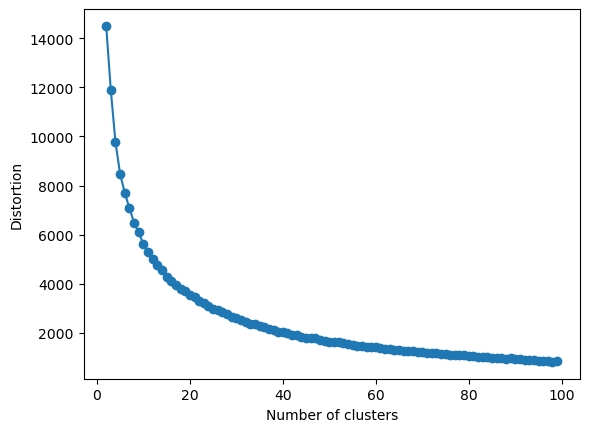

In [114]:
distortions = []

for i in range(2, 100):
    kmeans_i = KMeans(n_clusters=i, random_state=0)  # 모형 생성
    kmeans_i.fit(data_reduced)  # 모형 훈련
    distortions.append(kmeans_i.inertia_)

plt.plot(range(2, 100), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

C:\Users\samsung\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\samsung\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\samsung\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\samsung\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak o

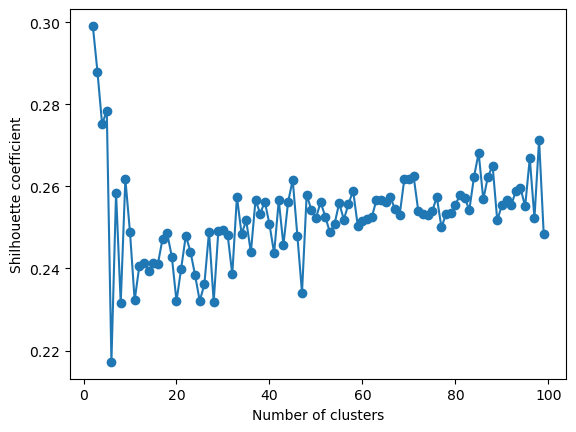

In [115]:
import warnings

# Ignore FutureWarnings from scikit-learn
warnings.simplefilter(action='ignore', category=FutureWarning)


silhouette = []

for i in range(2,100):
    kmeans_i = KMeans(n_clusters = i, random_state = 0) # 모형 생성
    kmeans_i.fit(data_reduced) # 모형 훈련
    silhouette_values = silhouette_score(data_reduced, kmeans_i.labels_)
    silhouette.append(silhouette_values)
    
plt.plot(range(2,100), silhouette, marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel('Shilhouette coefficient')
plt.show()

In [116]:
from matplotlib import cm

def silhouetteViz(n_cluster, X_features): 
    
    kmeans = KMeans(n_clusters=n_cluster, random_state=0)
    Y_labels = kmeans.fit_predict(X_features)
    
    silhouette_values = silhouette_samples(X_features, Y_labels, metric='euclidean')

    y_ax_lower, y_ax_upper = 0, 0
    y_ticks = []

    for c in range(n_cluster):
        c_silhouettes = silhouette_values[Y_labels == c]
        c_silhouettes.sort()
        y_ax_upper += len(c_silhouettes)
        color = cm.jet(float(c) / n_cluster)
        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouettes,
                 height=1.0, edgecolor='none', color=color)
        y_ticks.append((y_ax_lower + y_ax_upper) / 2.)
        y_ax_lower += len(c_silhouettes)
    
    silhouette_avg = np.mean(silhouette_values)
    plt.axvline(silhouette_avg, color='red', linestyle='--')
    plt.title('Number of Cluster : '+ str(n_cluster)+'\n' \
              + 'Silhouette Score : '+ str(round(silhouette_avg,3)))
    plt.yticks(y_ticks, range(n_cluster))   
    plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.ylabel('Cluster')
    plt.xlabel('Silhouette coefficient')
    plt.tight_layout()
    plt.show()

C:\Users\samsung\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


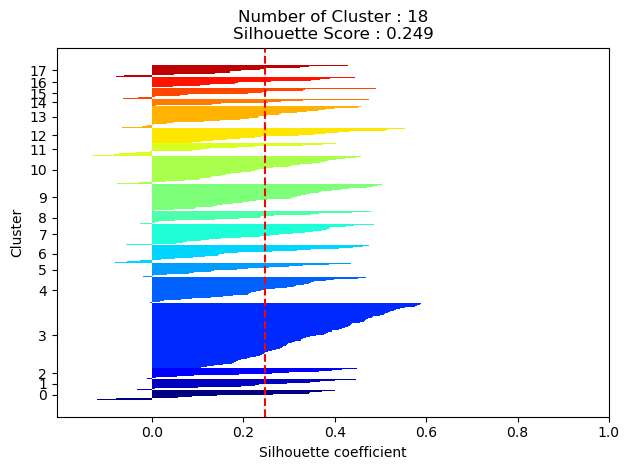

In [117]:
silhouetteViz(18, data_reduced)


### n_cluster를 기준으로 KMeans clustering

In [118]:
kmeans = KMeans(n_clusters=18, random_state=42)
res1 = pd.DataFrame(data_reduced)
model = kmeans.fit_predict(data_reduced)
res1["Cluster"] = model
res1

C:\Users\samsung\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


0         1         2  Cluster
0    3.629459 -0.970276 -1.008540       12
1   -1.964804 -2.332957 -0.752715        9
2    6.522121  0.451676  6.819701       16
3    1.948814 -0.261958 -1.358348        4
4   -5.825246 -3.120198  0.201985        6
..        ...       ...       ...      ...
622 -0.914463  0.280877 -0.303313        9
623 -2.493833 -4.289896  1.035497        6
624 -1.834861 -1.346653  1.355614        9
625 -0.239714 -2.177255  0.232216        9
626 -2.616116 -0.359062  0.347215       13

[627 rows x 4 columns]

#### 단어라벨 추가

In [119]:
res2 = res1.copy()
res2.index = word_matrix.index
res2

0         1         2  Cluster
소외    3.629459 -0.970276 -1.008540       12
다이어트 -1.964804 -2.332957 -0.752715        9
실패    6.522121  0.451676  6.819701       16
긍정    1.948814 -0.261958 -1.358348        4
피자   -5.825246 -3.120198  0.201985        6
...        ...       ...       ...      ...
불운   -0.914463  0.280877 -0.303313        9
택시   -2.493833 -4.289896  1.035497        6
악수   -1.834861 -1.346653  1.355614        9
단합   -0.239714 -2.177255  0.232216        9
첫사랑  -2.616116 -0.359062  0.347215       13

[627 rows x 4 columns]

In [120]:
res2[res2['Cluster'] == 1]

0         1         2  Cluster
공부   1.423691  0.051427  4.646308        1
구타   1.003261  0.792249  4.688231        1
만류   0.596958  1.970152  4.906808        1
등장  -3.869025 -2.450840  4.973971        1
일   -2.874836 -4.465822  4.634155        1
발견  -1.156301 -3.443704  3.623241        1
탕진   0.304721 -1.720056  2.148520        1
마무리  0.315353 -2.292520  4.298199        1
출생  -2.159212 -1.671063  5.019240        1
소개   0.950085 -1.982790  3.085245        1
수감   1.267794 -1.818906  6.069488        1
퇴장   0.305547 -1.050066  3.716828        1
활약  -0.570060 -0.036879  5.434963        1
동행   0.698405 -0.006940  6.042560        1
탈출  -0.021605  0.150460  8.348467        1
흥   -2.832464 -2.984774  4.165310        1
도망  -0.673300  1.742630  5.612800        1
방치   1.777744 -1.936112  2.979105        1
감옥  -1.818411  1.185065  5.314806        1
출발   0.664819 -3.936046  5.427181        1
저지   2.482572 -1.751832  5.399241        1
측은  -0.319540 -3.398600  2.679790        1
벌   -4.511844 -2.726982  4.953528        1
군대   0.653966  0.722562  4.304105        1
사표   0.153308 -1.767764  2.167368        1
초대  -3.153678 -2.119945  6.259038        1
귀가  -1.257412 -1.241994  2.642074        1
장관  -0.554974 -4.087116  3.616173        1
중퇴   0.104175 -2.839422  4.305862        1
기권   1.151832 -3.256890  2.752768        1

### 3차원 시각화

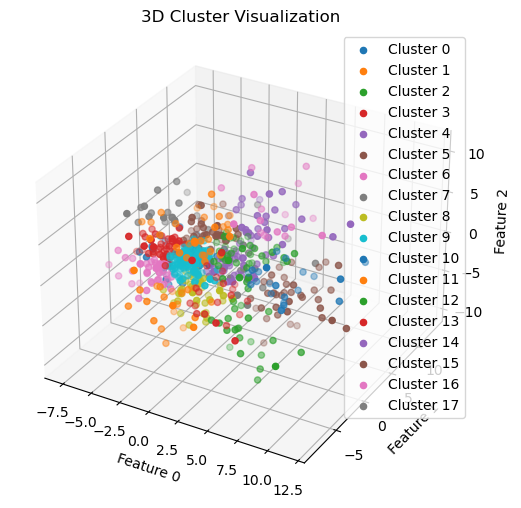

In [121]:

df = res2

# Visualize the 3D clusters
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

for cluster in range(df['Cluster'].nunique()):
    cluster_data = df[df['Cluster'] == cluster]
    ax.scatter(cluster_data[0], cluster_data[1], cluster_data[2], label=f'Cluster {cluster}')

ax.set_xlabel('Feature 0')
ax.set_ylabel('Feature 1')
ax.set_zlabel('Feature 2')
ax.set_title('3D Cluster Visualization')
ax.legend()

plt.show()

#### 클러스터명 지정

C:\Users\samsung\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


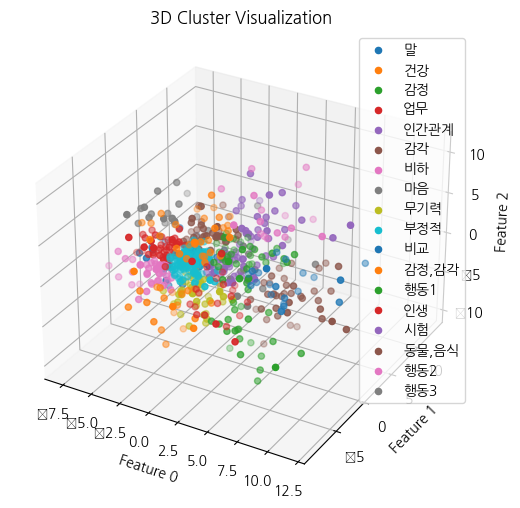

In [122]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Set the font family to one that supports Korean characters (e.g., 'Malgun Gothic' on Windows)
plt.rcParams['font.family'] = 'NanumGothic'

df = res2
cluster_names = {0: '말', 1: '건강', 2: '감정', 3: '업무', 4: '인간관계', 5: '감각', 6: '비하', 7: '마음', 8: '무기력', 9: '부정적', 10: '비교', 11: '감정,감각', 12: '행동1', 13: '인생', 14: '시험', 15: '동물,음식', 16: '행동2', 17: '행동3'}

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

for cluster in range(df['Cluster'].nunique()):
    cluster_data = df[df['Cluster'] == cluster]
    ax.scatter(cluster_data[0], cluster_data[1], cluster_data[2], label=f'{cluster_names.get(cluster, "Unknown")}')

ax.set_xlabel('Feature 0')
ax.set_ylabel('Feature 1')
ax.set_zlabel('Feature 2')
ax.set_title('3D Cluster Visualization')
ax.legend()

plt.show()


In [123]:
!pip install plotly


In [124]:
import plotly.graph_objects as go

df = res2
cluster_names = {0: '말', 1: '건강', 2: '감정', 3: '업무', 4: '인간관계', 5:'감각', 6:'비하', 7:'마음', 8:'무기력', 9:'부정적', 10:'비교', 11:'감정,감각', 12:'행동1', 13:'인생', 14:'시험', 15:'동물,음식', 16:'행동2', 17:'행동3'}  # Replace with your actual cluster names

# Create a trace for each cluster
traces = []
for cluster in range(df['Cluster'].nunique()):
    cluster_data = df[df['Cluster'] == cluster]
    trace = go.Scatter3d(
        x=cluster_data[0],
        y=cluster_data[1],
        z=cluster_data[2],
        mode='markers',
        marker=dict(size=5),
        name=cluster_names.get(cluster, f'Cluster {cluster}')
    )
    traces.append(trace)

# Create layout
layout = go.Layout(
    scene=dict(
        xaxis_title='Feature 0',
        yaxis_title='Feature 1',
        zaxis_title='Feature 2',
    ),
    title='3D Cluster Visualization',
    width=800,
    height=700  
)

# Create figure and plot
fig = go.Figure(data=traces, layout=layout)
fig.show()


## 최적의 성능을 내는 모델 

#### 적절한 PCA 값 찾기 1

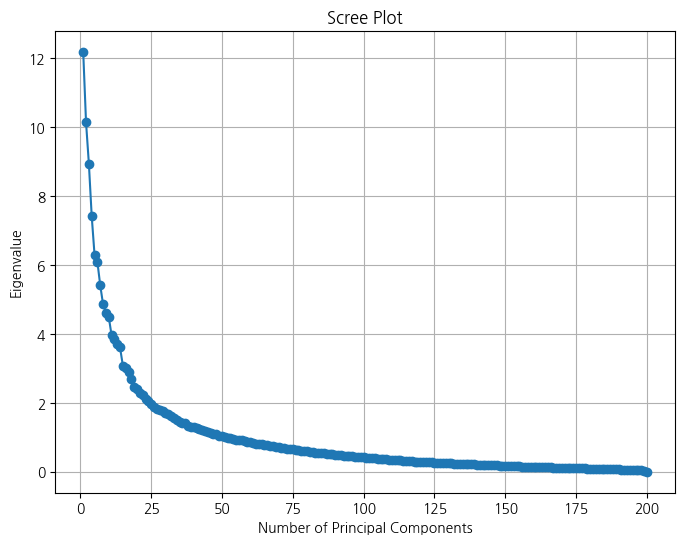

In [159]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

# Load a sample dataset (replace this with your own data)

# Standardize the features (optional but recommended for PCA)
X_standardized = (word_matrix - np.mean(word_matrix, axis=0)) / np.std(word_matrix, axis=0)

# Fit PCA and obtain the eigenvalues
pca = PCA()
pca.fit(X_standardized)
eigenvalues = pca.explained_variance_

# Plot the scree plot
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, len(eigenvalues) + 1), eigenvalues, marker='o')
plt.title('Scree Plot')
plt.xlabel('Number of Principal Components')
plt.ylabel('Eigenvalue')
plt.grid(True)
plt.show()

##### 5~ 15차원 사이의 값이 PCA에 가장 적절하다

#### 적절한 PCA 값 찾기 2


In [127]:
import optuna
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import load_iris
from sklearn.pipeline import Pipeline

X = word_matrix
# Define an objective function to optimize
def objective(trial):
    # Define the search space for hyperparameters
    n_components = trial.suggest_int('n_components',3,30)  # Number of components in PCA
    n_clusters = trial.suggest_int('n_clusters', 10,30)  # Number of clusters in KMeans

    # Create a pipeline with PCA and KMeans
    pipeline = Pipeline([
        ('reduce_dim', PCA(n_components=n_components)),
        ('cluster', KMeans(n_clusters=n_clusters))
    ])

    # Fit the pipeline
    pipeline.fit(X)

    # Evaluate the performance using silhouette score
    silhouette_avg = silhouette_score(X, pipeline.named_steps['cluster'].labels_)
    return silhouette_avg

# Create a study object and optimize the objective function
study = optuna.create_study(direction='maximize')  # maximize silhouette score
study.optimize(objective, n_trials=50)  # perform 50 trials

# Get the best hyperparameters
best_params = study.best_params
print("Best Hyperparameters:", best_params)


[I 2023-12-13 22:06:28,268] A new study created in memory with name: no-name-31eb0a7a-ba21-47e1-9f0c-f46b9ff0ddbc
C:\Users\samsung\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.

[I 2023-12-13 22:06:28,372] Trial 0 finished with value: -0.0007976588094606996 and parameters: {'n_components': 26, 'n_clusters': 22}. Best is trial 0 with value: -0.0007976588094606996.
C:\Users\samsung\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.

[I 2023-12-13 22:06:28,457] Trial 1 finished with value: 0.009186259470880032 and parameters: {'n_components': 26, 'n_clusters': 16}. Best is trial 

Best Hyperparameters: {'n_components': 26, 'n_clusters': 12}


In [160]:
! pip install optuna

#### 적절한 PCA 값 찾기 3


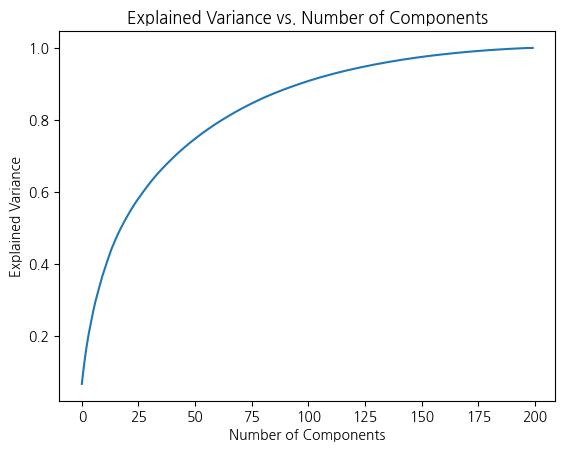

In [161]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Fit PCA
pca = PCA()
pca.fit(word_matrix)

# Plot explained variance
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.show()


### PCA로 차원 축소

In [163]:
import numpy as np
from sklearn.decomposition import PCA

# Number of desired dimensions after PCA
n_components = 4

# Standardize the features (optional but recommended for PCA)
data_standardized = (word_matrix - np.mean(word_matrix, axis=0)) / np.std(word_matrix, axis=0)

# Initialize PCA with the desired number of components
pca = PCA(n_components=n_components)

# Fit PCA and transform the data
data_reduced = pca.fit_transform(data_standardized)

# The variable data_reduced now contains the data in 24 dimensions

# Print the explained variance ratio for each selected component
print("Explained Variance Ratio for each component:")
print(pca.explained_variance_ratio_)

# Optionally, if you want to access the principal components themselves
principal_components = pca.components_

# You can also access the cumulative explained variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Print the cumulative explained variance
print("\nCumulative Explained Variance:")
print(cumulative_explained_variance)

Explained Variance Ratio for each component:
[0.06086355 0.05061388 0.04464001 0.03704272]

Cumulative Explained Variance:
[0.06086355 0.11147743 0.15611744 0.19316016]


#### 적절한 cluster 값 찾기 1


C:\Users\samsung\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.

C:\Users\samsung\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.

C:\Users\samsung\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.

C:\Users\samsung\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chun

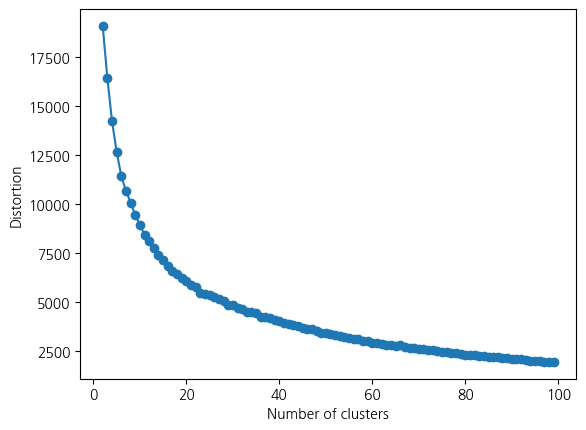

In [164]:
distortions = []

for i in range(2, 100):
    kmeans_i = KMeans(n_clusters=i, random_state=0)  # 모형 생성
    kmeans_i.fit(data_reduced)  # 모형 훈련
    distortions.append(kmeans_i.inertia_)

plt.plot(range(2, 100), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

#### 적절한 cluster 값 찾기 2


C:\Users\samsung\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.

C:\Users\samsung\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.

C:\Users\samsung\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.

C:\Users\samsung\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chun

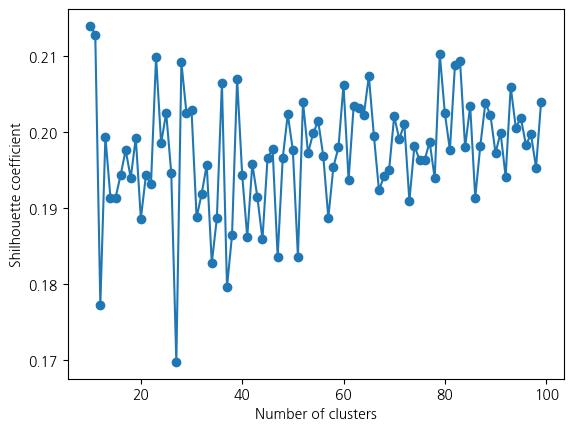

In [165]:
silhouette = []

for i in range(10, 100):
    kmeans_i = KMeans(n_clusters=i, random_state=0)  # 모형 생성
    kmeans_i.fit(data_reduced)  # 모형 훈련
    silhouette_values = silhouette_score(data_reduced, kmeans_i.labels_)
    silhouette.append(silhouette_values)

plt.plot(range(10, 100), silhouette, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Shilhouette coefficient')
plt.show()


#### 적절한 cluster 값 찾기 3


In [166]:
from matplotlib import cm

def silhouetteViz(n_cluster, X_features):
    kmeans = KMeans(n_clusters=n_cluster, random_state=0)
    Y_labels = kmeans.fit_predict(X_features)

    silhouette_values = silhouette_samples(X_features, Y_labels, metric='euclidean')

    y_ax_lower, y_ax_upper = 0, 0
    y_ticks = []

    for c in range(n_cluster):
        c_silhouettes = silhouette_values[Y_labels == c]
        c_silhouettes.sort()
        y_ax_upper += len(c_silhouettes)
        color = cm.jet(float(c) / n_cluster)
        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouettes,
                 height=1.0, edgecolor='none', color=color)
        y_ticks.append((y_ax_lower + y_ax_upper) / 2.)
        y_ax_lower += len(c_silhouettes)

    silhouette_avg = np.mean(silhouette_values)
    plt.axvline(silhouette_avg, color='red', linestyle='--')
    plt.title('Number of Cluster : ' + str(n_cluster) + '\n' \
              + 'Silhouette Score : ' + str(round(silhouette_avg, 3)))
    plt.yticks(y_ticks, range(n_cluster))
    plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.ylabel('Cluster')
    plt.xlabel('Silhouette coefficient')
    plt.tight_layout()
    plt.show()

C:\Users\samsung\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.



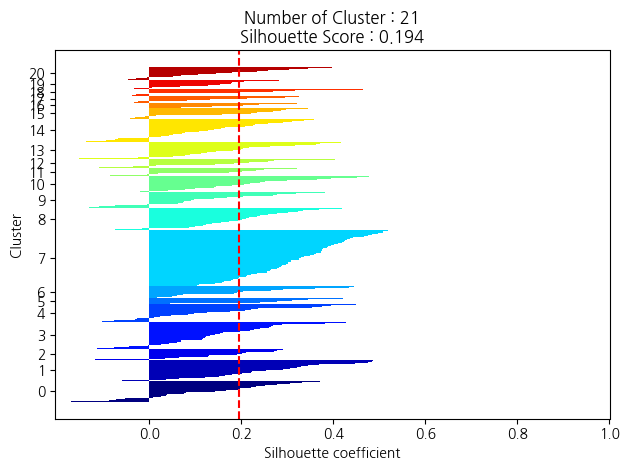

In [167]:
silhouetteViz(21, data_reduced)


### 결정된 PCA 차원, cluster 값으로 Kmeans 진행

In [169]:
kmeans = KMeans(n_clusters=21, random_state=42)
res1 = pd.DataFrame(data_reduced)
model = kmeans.fit_predict(data_reduced)
res1["Cluster"] = model
res1


C:\Users\samsung\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.



0         1         2         3  Cluster
0    3.629180 -0.972584 -1.002344 -0.797119       10
1   -1.965187 -2.332498 -0.751542  0.123498       13
2    6.519016  0.463614  6.820529  3.916197       12
3    1.949738 -0.270925 -1.346311 -0.053011       10
4   -5.825978 -3.117756  0.202291  0.166860       15
..        ...       ...       ...       ...      ...
622 -0.914742  0.282339 -0.303806 -0.183036        8
623 -2.495676 -4.277380  1.022894 -1.305591       13
624 -1.834936 -1.348359  1.359159 -0.988989       13
625 -0.239309 -2.182170  0.239675 -0.898909       13
626 -2.616485 -0.360686  0.353389 -1.763302       13

[627 rows x 5 columns]

#### 최종 clustering 된 단어 dataframe

In [170]:
res2 = res1.copy()
res2.index = word_matrix.index
res2

0         1         2         3  Cluster
소외    3.629180 -0.972584 -1.002344 -0.797119       10
다이어트 -1.965187 -2.332498 -0.751542  0.123498       13
실패    6.519016  0.463614  6.820529  3.916197       12
긍정    1.949738 -0.270925 -1.346311 -0.053011       10
피자   -5.825978 -3.117756  0.202291  0.166860       15
...        ...       ...       ...       ...      ...
불운   -0.914742  0.282339 -0.303806 -0.183036        8
택시   -2.495676 -4.277380  1.022894 -1.305591       13
악수   -1.834936 -1.348359  1.359159 -0.988989       13
단합   -0.239309 -2.182170  0.239675 -0.898909       13
첫사랑  -2.616485 -0.360686  0.353389 -1.763302       13

[627 rows x 5 columns]

In [171]:
res2[res2['Cluster'] == 7]

0         1         2         3  Cluster
불만    6.168891  6.181489 -1.916482 -2.515426        7
의문    4.089477  4.310509 -2.864752 -0.291308        7
노력    7.465088  3.365423 -3.585085  0.287663        7
불안    4.666169  3.155024 -3.804112  1.188636        7
만족    6.236821  1.510537 -1.072267  6.485846        7
충격    3.045933  3.876738 -3.604045  2.904035        7
위협    8.706836  4.211105  0.684420  0.941648        7
긴장    2.830843  1.013620 -3.912328  1.448372        7
의도    6.454974  2.623291 -3.224332 -1.544654        7
혐오    3.045218  2.883376 -2.898082  0.148788        7
의지    6.555263  4.530377 -3.534655 -0.012115        7
도움    3.425625  3.753425 -0.054965  0.739538        7
불편    4.580819  1.942147 -3.296152  4.276810        7
곤란    4.988782  0.695319 -2.096848  2.819295        7
기대    6.302145  2.689469 -3.094288  1.602130        7
어려움   5.032400  1.295653 -5.224978 -1.267908        7
잘못    4.717257  2.857152  0.238397  0.916886        7
갈등    5.482761  2.679407 -3.085725 -2.726311        7
생각    6.397419  6.891384 -1.608879  6.335868        7
질문    4.309242  5.128236 -1.395332 -0.604867        7
성취    4.130305  1.357535 -2.901553  0.681844        7
집착    3.323189  5.003172 -2.347076  2.588121        7
혼란    4.886987  3.069222 -2.577637  2.173115        7
의견    7.872838  4.759052 -3.141235 -2.919937        7
부담   10.094104  0.251387 -2.969698  0.560340        7
신뢰    8.399324  1.747264 -3.171964  0.657193        7
이해    8.590712  1.670240 -4.237105  3.479695        7
역할    4.189635  0.161318 -3.952258  0.748569        7
반성    4.069202  2.139299 -1.162293  0.241771        7

#### 클러스터 idx로 정렬

In [172]:
# Sort DataFrame by 'Cluster' column
sorted_df = res2.sort_values(by='Cluster')

# Display the sorted DataFrame
print(sorted_df)

            0         1         2         3  Cluster
고생  -0.165692  2.732427  0.919396  3.584137        0
자랑  -1.127313  0.605470 -0.354398  4.918510        0
당황   1.272575  2.634264  3.271940  3.653606        0
싫   -1.898087  2.508225  1.119742  0.834226        0
유혹  -0.523408  5.207531  3.180917  2.393066        0
..        ...       ...       ...       ...      ...
재산   6.504484  0.221872 -2.162962 -6.706666       20
역량   2.687725 -0.954029 -6.487155 -3.006246       20
폭력   5.341737  0.357142 -3.468111 -4.090882       20
권리  10.818668  1.252282 -4.300346 -7.044491       20
제재   7.085634 -1.890219 -0.656873 -2.731858       20

[627 rows x 5 columns]


#### cluster완료된 최종 결과 테이블

In [174]:
sorted_df.to_csv("sorted_result.csv")

### KMEANS 모델 저장
#### 4차원 특징 / 21개 cluster


In [143]:

import pickle

with open("KMEANS_model", 'wb') as f:
    pickle.dump(kmeans, f)
#### 모델 불러오기
with open("KMEANS_model", 'rb') as f:
    mod = pickle.load(f)
mod


KMeans(n_clusters=21, random_state=42)